In [2]:
import pandas as pd
import functions
import seaborn as sns
import matplotlib.pyplot as plt

fiw16, oilre16, oilpr16 = functions.get_data_per_year(2016)



merged16 = pd.merge(fiw16, oilre16, on="clean_codes")
merged16 = pd.merge(merged16, oilpr16, on="clean_codes")

merged16

Abkhazia not found in regex
Crimea not found in regex
Eastern Donbas not found in regex
Nagorno-Karabakh not found in regex
South Ossetia not found in regex
Tibet not found in regex
Transnistria not found in regex
Chechnya not found in regex
Serbia and Montenegro not found in regex
AFE not found in ISO3
AFW not found in ISO3
ARB not found in ISO3
CEB not found in ISO3
CHI not found in ISO3
CSS not found in ISO3
EAP not found in ISO3
EAR not found in ISO3
EAS not found in ISO3
ECA not found in ISO3
ECS not found in ISO3
EMU not found in ISO3
EUU not found in ISO3
FCS not found in ISO3
HIC not found in ISO3
HPC not found in ISO3
IBD not found in ISO3
IBT not found in ISO3
IDA not found in ISO3
IDB not found in ISO3
IDX not found in ISO3
INX not found in ISO3
LAC not found in ISO3
LCN not found in ISO3
LDC not found in ISO3
LIC not found in ISO3
LMC not found in ISO3
LMY not found in ISO3
LTE not found in ISO3
MEA not found in ISO3
MIC not found in ISO3
MNA not found in ISO3
NAC not found

     clean_codes  FreedomInTheWorld
1678         AFG                 24
1679         ALB                 67
1680         DZA                 35
1681         AND                 96
1682         AGO                 24
  clean_codes  OilRentPercentGDP
0         ABW           0.000000
2         AFG           0.009445
4         AGO          19.748399
5         ALB           0.884411
6         AND                NaN
    clean_codes  OilProdPerCapita
36          AFG            0.0000
277         ALB         5344.6523
394         DZA        19724.9120
438         ASM            0.0000
555         AGO        34213.3800


Abkhazia not found in regex
Crimea not found in regex
Eastern Donbas not found in regex
Nagorno-Karabakh not found in regex
South Ossetia not found in regex
Tibet not found in regex
Transnistria not found in regex
Chechnya not found in regex
Serbia and Montenegro not found in regex
AFE not found in ISO3
AFW not found in ISO3
ARB not found in ISO3
CEB not found in ISO3
CHI not found in ISO3
CSS not found in ISO3
EAP not found in ISO3
EAR not found in ISO3
EAS not found in ISO3
ECA not found in ISO3
ECS not found in ISO3
EMU not found in ISO3
EUU not found in ISO3
FCS not found in ISO3
HIC not found in ISO3
HPC not found in ISO3
IBD not found in ISO3
IBT not found in ISO3
IDA not found in ISO3
IDB not found in ISO3
IDX not found in ISO3
INX not found in ISO3
LAC not found in ISO3
LCN not found in ISO3
LDC not found in ISO3
LIC not found in ISO3
LMC not found in ISO3
LMY not found in ISO3
LTE not found in ISO3
MEA not found in ISO3
MIC not found in ISO3
MNA not found in ISO3
NAC not found

,clean_codes,FreedomInTheWorld,OilRentPercentGDP,OilProdPerCapita
0,AFG,24,0.009445,0.0000
1,ALB,67,0.884411,5344.6523
2,DZA,35,10.026219,19724.9120
3,AGO,24,19.748399,34213.3800
4,ATG,82,0.000000,0.0000
...,...,...,...,...
188,VNM,20,0.828043,1937.0735
189,PSE,30,0.000000,0.0000
190,YEM,17,0.681566,639.8096
191,ZMB,60,0.000000,0.0000


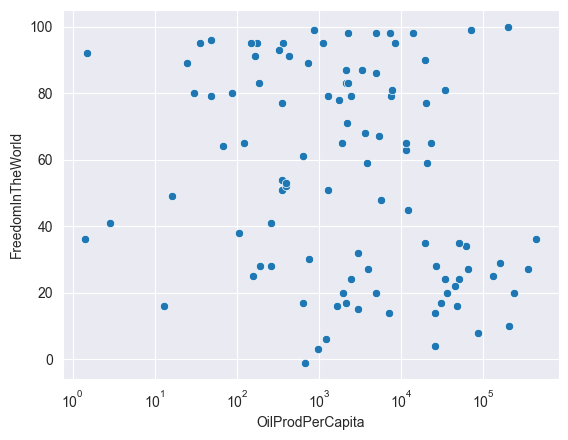

In [3]:
sns.scatterplot(data=merged16, x="OilProdPerCapita", y="FreedomInTheWorld",)
plt.xscale('log')
plt.show()

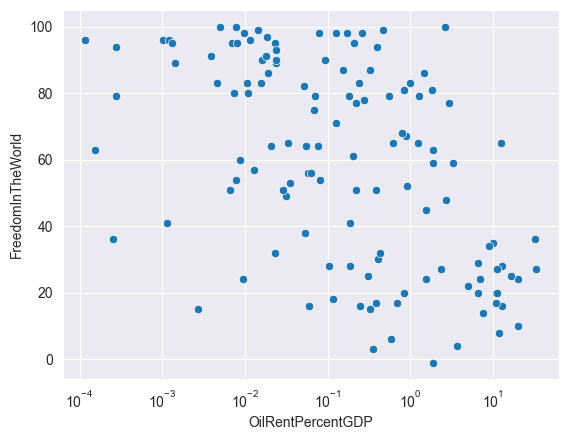

In [4]:
sns.scatterplot(data=merged16, x="OilRentPercentGDP", y="FreedomInTheWorld",)
plt.xscale('log')
plt.show()

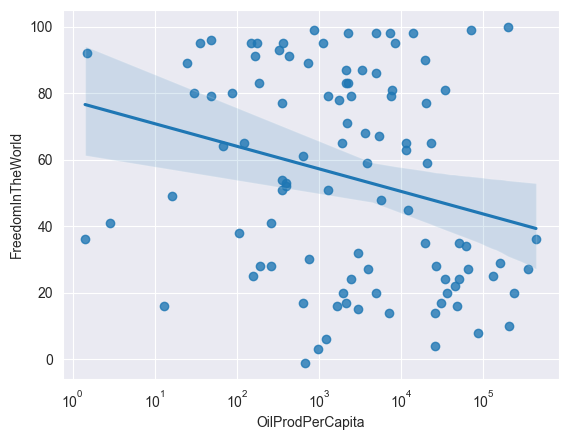

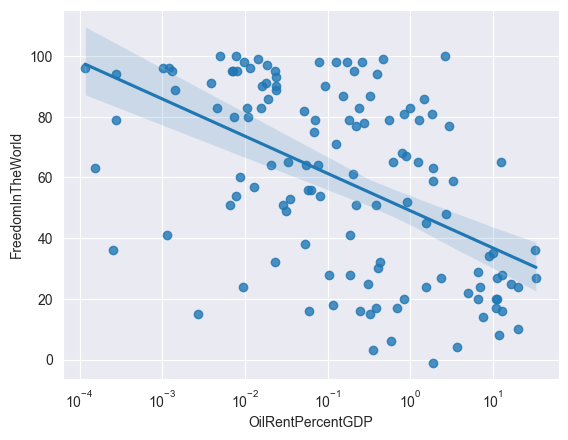

In [5]:
merged16_filtered = merged16[merged16["OilProdPerCapita"] > 0]

sns.regplot(data=merged16_filtered, x="OilProdPerCapita", y="FreedomInTheWorld", logx=True)
plt.xscale('log')
plt.show()

merged16_filtered = merged16[merged16["OilRentPercentGDP"] > 0]

sns.regplot(data=merged16_filtered, x="OilRentPercentGDP", y="FreedomInTheWorld", logx=True)
plt.xscale('log')
plt.show()

In [6]:
def clean_fsi(fsi):
    fsi["Country"] = fsi["Country"].replace("Israel and West Bank", "Israel")
    fsi = functions.clean_up_countries(fsi, "Country")
    fsi = fsi[["clean_codes", "Rank", "2016"]].rename(columns={"Rank":"FSIRank", "2016":"FSIScore"})
    fsi['FSIRank'] = fsi['FSIRank'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
    fsi["FSIScore"] = fsi['FSIScore'].astype(float)
    fsi["FSIRank"] = fsi['FSIRank'].astype(int)
    return fsi

fsi_data16 = pd.read_csv('Rankings2016.csv', encoding='ISO-8859-1', skiprows=1, delimiter=';')

fsi_filtered = clean_fsi(fsi_data16)

merged16fsi = pd.merge(merged16, fsi_filtered, on="clean_codes")

merged16fsi


,clean_codes,FreedomInTheWorld,OilRentPercentGDP,OilProdPerCapita,FSIRank,FSIScore
0,AFG,24,0.009445,0.0000,9,107.9
1,ALB,67,0.884411,5344.6523,124,61.2
2,DZA,35,10.026219,19724.9120,76,78.3
3,AGO,24,19.748399,34213.3800,37,90.5
4,ATG,82,0.000000,0.0000,129,56.2
...,...,...,...,...,...,...
176,VEN,35,NaN,50148.2580,63,81.6
177,VNM,20,0.828043,1937.0735,106,70.7
178,YEM,17,0.681566,639.8096,4,111.5
179,ZMB,60,0.000000,0.0000,49,86.3


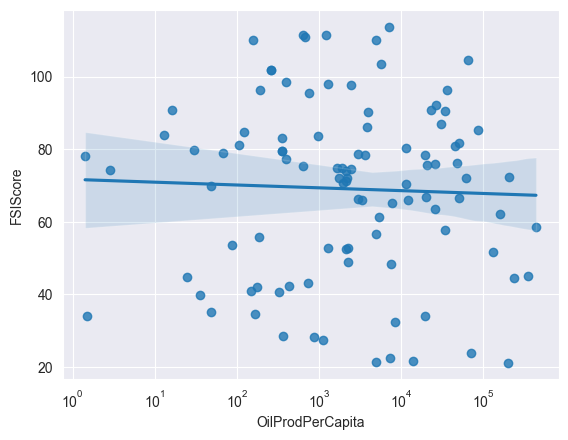

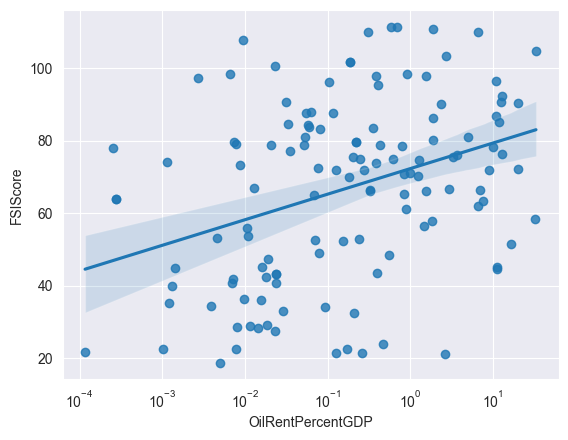

In [7]:
merged16fsi_filtered = merged16fsi[merged16fsi["OilProdPerCapita"] > 0]

sns.regplot(data=merged16fsi_filtered, x="OilProdPerCapita", y="FSIScore", logx=True)
plt.xscale('log')
plt.show()

merged16fsi_filtered = merged16fsi[merged16fsi["OilRentPercentGDP"] > 0]

sns.regplot(data=merged16fsi_filtered, x="OilRentPercentGDP", y="FSIScore", logx=True)
plt.xscale('log')
plt.show()